In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\micha\OneDrive\Pulpit\covid\new_cases.csv")

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)
gotowe_case2 = df[df['World'] != 0]
gotowe_case2.head()

,World,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-12,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-19,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,1896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-02-02,12538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


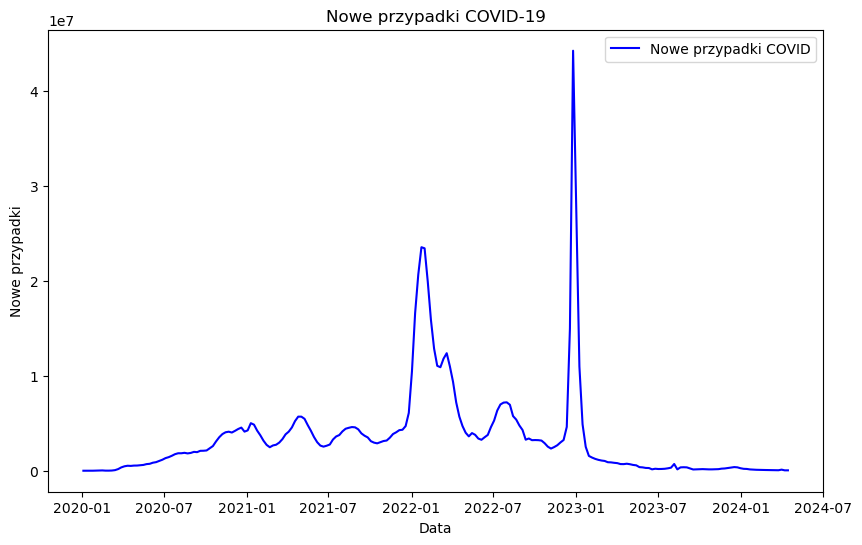

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(gotowe_case2.index, gotowe_case2['World'], label='Nowe przypadki COVID', color='blue')
plt.title('Nowe przypadki COVID-19')
plt.xlabel('Data')
plt.ylabel('Nowe przypadki')
plt.legend()
plt.show()

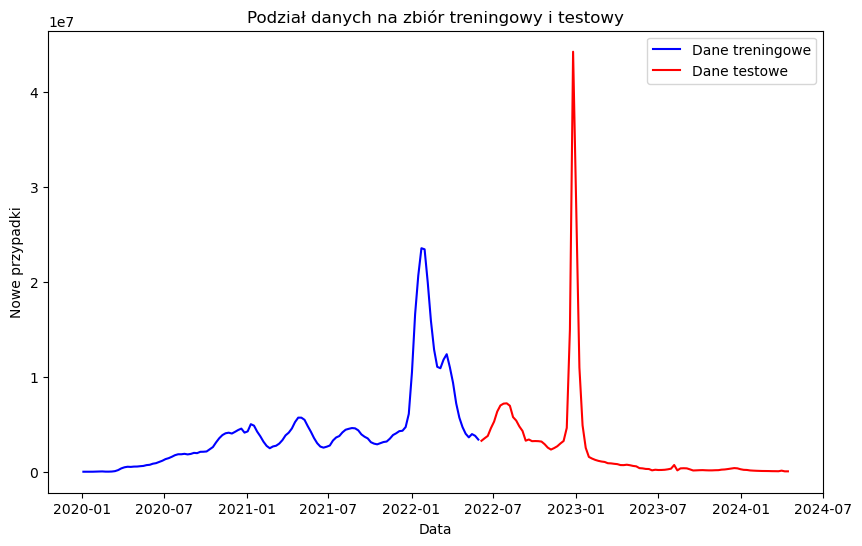

In [3]:
train_data = gotowe_case2[gotowe_case2.index<'2022-06-05']
test_data = gotowe_case2[gotowe_case2.index>='2022-06-05']
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['World'], label='Dane treningowe', color='blue')
plt.plot(test_data.index, test_data['World'], label='Dane testowe', color='red')
plt.title('Podział danych na zbiór treningowy i testowy')
plt.xlabel('Data')
plt.ylabel('Nowe przypadki')
plt.legend()
plt.show()

C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimizat

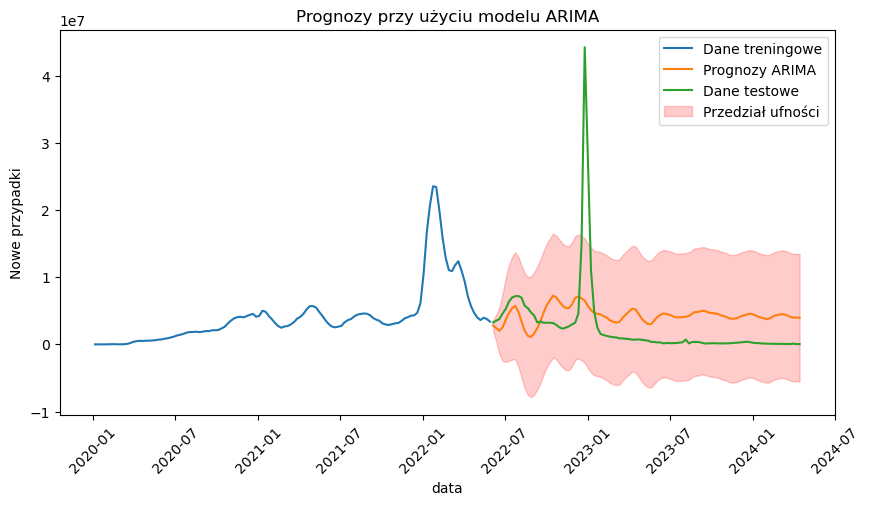

In [21]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train_data['World'], order=(40,0,4)) 
fit_model = model.fit()
forecast = fit_model.get_forecast(steps=len(test_data))


forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

arima_forecast = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['World'], label='Dane treningowe')
plt.plot(test_data.index, arima_forecast, label='Prognozy ARIMA')
plt.plot(test_data.index, test_data['World'], label='Dane testowe')
plt.fill_between(test_data.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.2, label='Przedział ufności')

plt.xlabel('data')
plt.xticks(rotation=45)
plt.ylabel('Nowe przypadki')
plt.title('Prognozy przy użyciu modelu ARIMA')
plt.legend()
plt.show()

C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting

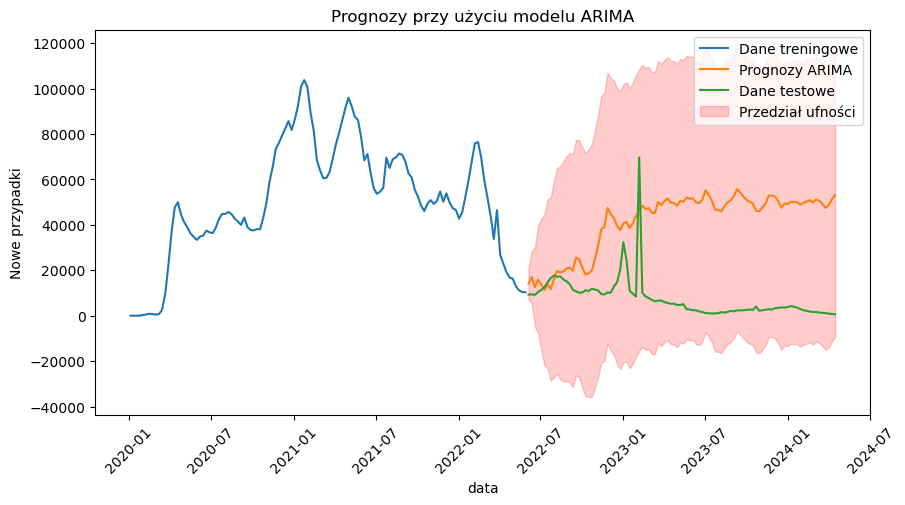

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv(r"C:\Users\micha\OneDrive\Pulpit\covid\new_deaths.csv")

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)
gotowe_case2 = df[df['World'] != 0]
train_data = gotowe_case2[gotowe_case2.index<'2022-06-05']
test_data = gotowe_case2[gotowe_case2.index>='2022-06-05']
model = ARIMA(train_data['World'], order=(40,0,15)) 
fit_model = model.fit()
forecast = fit_model.get_forecast(steps=len(test_data))


forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

arima_forecast = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['World'], label='Dane treningowe')
plt.plot(test_data.index, arima_forecast, label='Prognozy ARIMA')
plt.plot(test_data.index, test_data['World'], label='Dane testowe')
plt.fill_between(test_data.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.2, label='Przedział ufności')

plt.xlabel('data')
plt.xticks(rotation=45)
plt.ylabel('Nowe przypadki')
plt.title('Prognozy przy użyciu modelu ARIMA')
plt.legend()
plt.show()

C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\micha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


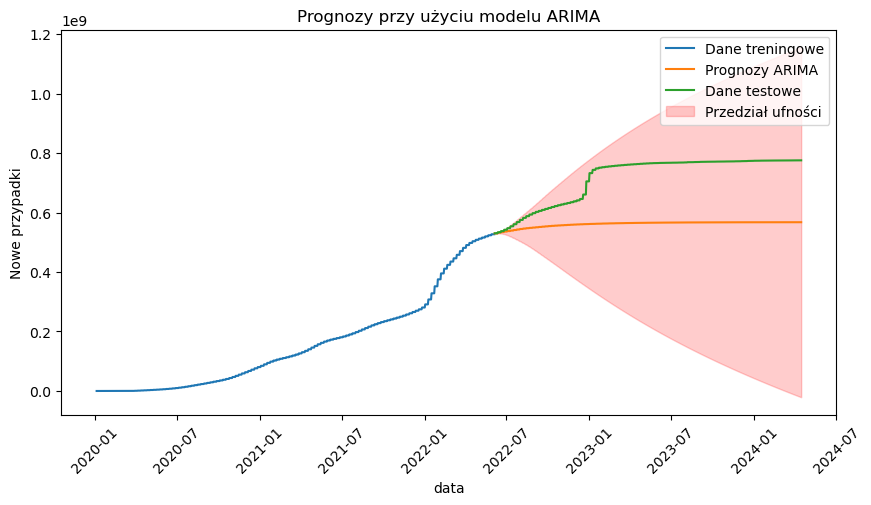

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv(r"C:\Users\micha\OneDrive\Pulpit\covid\total_cases.csv")

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)
gotowe_case2 = df[df['World'] != 0]
train_data = gotowe_case2[gotowe_case2.index<'2022-06-05']
test_data = gotowe_case2[gotowe_case2.index>='2022-06-05']
model = ARIMA(train_data['World'], order=(60,1,5)) 
fit_model = model.fit()
forecast = fit_model.get_forecast(steps=len(test_data))


forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

arima_forecast = fit_model.predict(start=test_data.index[0], end=test_data.index[-1])
plt.figure(figsize=(10, 5))
plt.plot(train_data.index, train_data['World'], label='Dane treningowe')
plt.plot(test_data.index, arima_forecast, label='Prognozy ARIMA')
plt.plot(test_data.index, test_data['World'], label='Dane testowe')
plt.fill_between(test_data.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.2, label='Przedział ufności')

plt.xlabel('data')
plt.xticks(rotation=45)
plt.ylabel('Nowe przypadki')
plt.title('Prognozy przy użyciu modelu ARIMA')
plt.legend()
plt.show()